In [2]:
# 기본 패키지 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
plt.style.use("seaborn")
sns.set(font_scale=1)
sns.set_style("whitegrid")

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 맥 OS 폰트 깨짐 방지 코드
from matplotlib import rc
import matplotlib as mpl 
import matplotlib.font_manager as fm 

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# # COLAB 폰트 깨짐 방지 코드
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# # 설치후 런타임 재시작 필수 

# # matplotlib에 나눔고딕 폰트 적용
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# # 기본 폰트 설정
# plt.rc('font', family='NanumBarunGothic')
# # 깨짐방지 테스트
# plt.text(0.5, 0.5, '안녕하세요, 한글 폰트 테스트입니다!', ha='center', va='center', size=15)
# plt.show()

# 데이터 준비

## 데이터 불러오기

In [4]:
# 데이터 불러오기
london_lists_raw = pd.read_csv('../../../../../data_weekly/inside_airbnb/London/listings.csv')
# london_lists_summary_raw = pd.read_csv('../../../../../data_weekly/inside_airbnb/London/listings_outline.csv')
# london_neighbourhoods_raw = pd.read_csv('../../../../../data_weekly/inside_airbnb/London/neighbourhoods.csv')
# london_reviews_raw = pd.read_csv('../../../../../data_weekly/inside_airbnb/London/reviews.csv')
# london_reviews_summary_raw = pd.read_csv('../../../../../data_weekly/inside_airbnb/London/reviews_outline.csv')

# 분석할 df 별도 복사
london_lists = london_lists_raw.copy()
# london_reviews = london_reviews_raw.copy()

# 출력
london_lists.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,20240319050633,2024-03-21,city scrape,Spacious Central London Apartment by Hoxton Sq...,"Very central location, in the middle of Shored...",Everything is so convenient and the area is al...,https://a0.muscache.com/pictures/miso/Hosting-...,1608226,...,5.00,4.89,4.93,NaN,f,1,1,0,0,0.86
1,13913,https://www.airbnb.com/rooms/13913,20240319050633,2024-03-20,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.83,4.70,4.70,NaN,f,3,2,1,0,0.25
2,15400,https://www.airbnb.com/rooms/15400,20240319050633,2024-03-20,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.54
3,159736,https://www.airbnb.com/rooms/159736,20240319050633,2024-03-20,city scrape,A double Room 5mins from King's College Hospital,Calm sunny double room with a queen size bed a...,We love that in Loughborough Junction we live ...,https://a0.muscache.com/pictures/1067303/d2300...,766056,...,4.89,4.34,4.66,NaN,f,4,0,4,0,0.62
4,165336,https://www.airbnb.com/rooms/165336,20240319050633,2024-03-21,city scrape,Charming Flat in Notting Hill,A stylish apartment close to Portobello market...,"Notting Hill has many cafes, bars and restaura...",https://a0.muscache.com/pictures/60757460/47f8...,761400,...,4.96,4.87,4.71,NaN,f,1,1,0,0,1.57


## 분석에서 사용하지 않을 컬럼 삭제
- 추가한 컬럼 : description, host_has_profile_pic, host_identity_verified

In [5]:
# 1차 선별한 컬럼 25개 중 22개 2차 선별 + 1개(숙소_예약가능_여부)
# 최근 리뷰가 작성되었는지를 보기 위해 2개 컬럼 추가_240529 >> 'number_of_reviews_ltm' // 'last_review'
# 'listing_url' 컬럼 london_lists에 적용_240530
# 240602_추가한 컬럼 : description, host_has_profile_pic, host_identity_verified


columns_selected = ['id', 'listing_url', 'description', 'host_id', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', \
    'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# 'host_acceptance_rate', 'minimum_nights', 'maximum_nights', 'has_availability', 'host_total_listings_count', 'host_has_profile_pic', 'bathrooms',

# 선별한 컬럼만 적용
london_lists = london_lists[columns_selected]


# 변수 정리 
london_lists = london_lists.rename(columns={
    'id': '숙소_id',
    'listing_url' : '숙소_url',
    'description' : '숙소_설명',
    'host_id': '호스트_id',
    'host_response_time': '답변_평균시간',
    'host_response_rate': '문의_응답률',
    # 'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    # 'host_total_listings_count': '숙소_수',
    'host_has_profile_pic' : '프로필_사진',
    'host_identity_verified' : '호스트_신원',
    'neighbourhood_cleansed': '숙소_지역',
    'property_type' : '숙소_특징',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    # 'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    # 'minimum_nights': '최소_숙박일',
    # 'maximum_nights': '최대_숙박일',
    'has_availability' : '예약_가능여부',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_ltm' : '12개월_리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'last_review' : '마지막_리뷰',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
 
})

# 컬럼명 확인
london_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   숙소_설명        87851 non-null  object 
 3   호스트_id       90852 non-null  int64  
 4   답변_평균시간      57797 non-null  object 
 5   문의_응답률       57797 non-null  object 
 6   슈퍼호스트        90463 non-null  object 
 7   프로필_사진       90847 non-null  object 
 8   호스트_신원       90847 non-null  object 
 9   숙소_지역        90852 non-null  object 
 10  숙소_특징        90852 non-null  object 
 11  숙소_유형        90852 non-null  object 
 12  수용_인원수       90852 non-null  int64  
 13  침실수          78118 non-null  float64
 14  침대수          57837 non-null  float64
 15  편의시설         90852 non-null  object 
 16  숙소_가격        57885 non-null  object 
 17  예약_가능여부      86773 non-null  object 
 18  리뷰수          90852 non-null  int64  
 19  12개월

## 데이터 전처리

### 결측치 처리
- 숙소 유형  >> 모든 데이터 사용
- (이외 상세 내용은 가격_관계분석_런던2.ipynb확인요망)

In [6]:
print(f'런던 데이터 전체 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 리뷰수가 0인 데이터 제거
condition_review_0 = london_lists['리뷰수'] == 0
london_lists = london_lists[~condition_review_0]
print(f'리뷰가 0인 데이터 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 카테고리 타입 데이터 비율 및 개수 세는 함수 선언
def CategoricalData_Count_Ratio(name_of_dataframe, name_of_column):

    print(f'전체 숙소 개수: {name_of_dataframe.shape[0]}개')
    print()

    type_list = name_of_dataframe[name_of_column].unique().tolist()

    for type in type_list:
        condition_type = name_of_dataframe[name_of_column] == type
        ratio_type = round((name_of_dataframe[condition_type].shape[0] / name_of_dataframe.shape[0]) * 100, 2)
        print(f'{name_of_column}이 {type}인 숙소의 개수: {name_of_dataframe[condition_type].shape[0]}개')
        print(f'{name_of_column}이 {type}인 숙소의 비율 : {ratio_type}%')
        print()


# # 숙소 유형 [Entire home/apt & Private room] 데이터만 선별
# condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'
# condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'
# london_lists = london_lists[(condition_room_entirehomeapt | condition_room_privateroom)]
# print('[Entire home/apt / Private room] 데이터만 선별 : ')
# CategoricalData_Count_Ratio(london_lists, '숙소_유형')
# print("-" * 60)

# 예약_가능여부 Null값 제거 및 예약 불가능 숙소 제거
london_lists = london_lists[london_lists["예약_가능여부"].notnull()]
condition_availability_f = london_lists['예약_가능여부'] == 'f'
london_lists = london_lists[~condition_availability_f]
print(f'Null값 제거 및 예약 불가능 숙소 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 숙소 가격 타입 변환 >> float
london_lists['숙소_가격'] = london_lists['숙소_가격'].str.lstrip('$').str.replace(',', '').astype('float')

# 가격 null값 제거 
condition_price_notnull = london_lists['숙소_가격'].notnull()
london_lists = london_lists[condition_price_notnull] 
print(f'가격 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 슈퍼호스트 결측치 제거
london_lists = london_lists.dropna(subset=['슈퍼호스트'])
print(f'슈퍼호스트 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)


# 침대수, 침실수 결측치 제거
london_lists = london_lists.dropna(subset=['침실수', '침대수'])
print(f'침실수, 침대수 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)


# 각 리뷰 점수 컬럼 Null 값 제거 
type_review_null_any = london_lists[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].isnull().any(axis=1)
london_lists = london_lists[~type_review_null_any]
print(f'각 리뷰점수 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

런던 데이터 전체 개수: 90852개
------------------------------------------------------------
리뷰가 0인 데이터 제거 후 데이터 개수: 65869개
------------------------------------------------------------
Null값 제거 및 예약 불가능 숙소 제거 후 데이터 개수: 64463개
------------------------------------------------------------
가격 Null값 제거 후 데이터 개수: 43720개
------------------------------------------------------------
슈퍼호스트 Null값 제거 후 데이터 개수: 43454개
------------------------------------------------------------
침실수, 침대수 Null값 제거 후 데이터 개수: 43367개
------------------------------------------------------------
각 리뷰점수 Null값 제거 후 데이터 개수: 43345개
------------------------------------------------------------


### 이상치 처리
- 기존 전처리에서 각 숙소_유형 별 상위 10개(개수) 선별하지 않음 >> 모든 데이터 사용
- 욕실수, 침실수, 침대수 이상치 처리도 다 해버리자~ (스케일러 사용 관련)
- (이외 이상치 처리 상세 내용은 가격_관계분석_런던2.ipynb확인요망)

In [7]:
# # 각 숙소_유형 별 상위 10개(개수) 숙소_특징 데이터만 선별 
# # 조건 생성
# sorted_PrivateRoom = london_lists.groupby(['숙소_유형', '숙소_특징']).size().reset_index(name='count').sort_values(by=['숙소_유형', 'count'], ascending=False, ignore_index=True)[:28].reset_index(drop=True)
# sorted_EntireHomeApt = london_lists.groupby(['숙소_유형', '숙소_특징']).size().reset_index(name='count').sort_values(by=['숙소_유형', 'count'], ascending=False, ignore_index=True)[28:].reset_index(drop=True)
# sorted_PrivateRoom_top10 = sorted_PrivateRoom['숙소_특징'][:10].values
# sorted_EntireHomeApt_top10 = sorted_EntireHomeApt['숙소_특징'][:10].values
# condition_PrivateRoom_top10 = london_lists['숙소_특징'].isin(sorted_PrivateRoom_top10)
# condition_EntireHomeApt_top10 = london_lists['숙소_특징'].isin(sorted_EntireHomeApt_top10)
# # 데이터 제거
# london_lists = london_lists[(condition_PrivateRoom_top10 | condition_EntireHomeApt_top10)]
# print(f'숙소_유형별 숙소_특징 상위 10개씩 20개 선별 후 데이터 개수: {london_lists.shape[0]}개')
# print("-" * 60)


# 12개월_리뷰수가 0인 경우 제거 
condition_reviewforyear_0 = london_lists['12개월_리뷰수'] == 0
london_lists = london_lists[~condition_reviewforyear_0]
print(f'12개월_리뷰수가 0인 데이터 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)


# 수용인원수 이상치 처리 (숙소 유형별 처리)
accommodates_type_list = london_lists['숙소_유형'].unique().tolist()

def delete_outlier_IQR_InnerFence(column_name):
    # 전역 변수 선언
    global london_lists
    # 숙소 유형별 Inner Fencs Out Lier 제거 
    for type in accommodates_type_list:
        condition_room_type = london_lists['숙소_유형'] == type
        Q1 = london_lists[column_name][condition_room_type].quantile(.25)
        Q3 = london_lists[column_name][condition_room_type].quantile(.75)
        IQR = Q3 - Q1
        condition_accommodates_upper_outliers = london_lists[column_name][condition_room_type] > (Q3 + IQR * 1.5)
        accommodates_upper_outliers = london_lists[condition_room_type][condition_accommodates_upper_outliers]
        upper_outlier_indices = accommodates_upper_outliers.index
        london_lists = london_lists.drop(index=upper_outlier_indices)
        print(f'{type} 데이터 중 {column_name} Upper_outlier 제거 후 데이터 개수 : {london_lists.shape[0]}개')

delete_outlier_IQR_InnerFence('수용_인원수')
print("-" * 60)

# 침실수 이상치 처리
delete_outlier_IQR_InnerFence('침실수')
print("-" * 60)

# 침대수 이상치 처리 
delete_outlier_IQR_InnerFence('침대수')
print("-" * 60)


# 가격 이상치 처리 (숙소 유형별 처리)

accommodates_type_list = london_lists['숙소_유형'].unique().tolist()

def delete_outlier_IQR_OuterFence(column_name):
    # 전역 변수 선언
    global london_lists
    # 숙소 유형별 Outer Fencs Out Lier 제거 
    for type in accommodates_type_list:
        condition_room_type = london_lists['숙소_유형'] == type
        Q1 = london_lists[column_name][condition_room_type].quantile(.25)
        Q3 = london_lists[column_name][condition_room_type].quantile(.75)
        IQR = Q3 - Q1
        condition_accommodates_upper_outliers = london_lists[column_name][condition_room_type] > (Q3 + IQR * 3)
        accommodates_upper_outliers = london_lists[condition_room_type][condition_accommodates_upper_outliers]
        upper_outlier_indices = accommodates_upper_outliers.index
        london_lists = london_lists.drop(index=upper_outlier_indices)
        print(f'{type} 데이터 중 {column_name} Upper_outlier 제거 후 데이터 개수 : {london_lists.shape[0]}개')

delete_outlier_IQR_OuterFence('숙소_가격')
print("-" * 60)

# 가격이 0원인 숙소 제거 
condition_price_0 = london_lists['숙소_가격'] == 0
london_lists = london_lists[~condition_price_0]
print(f'"숙소_가격"이 0원인 데이터 제거 후 데이터 개수 : {london_lists.shape[0]}개')

12개월_리뷰수가 0인 데이터 제거 후 데이터 개수: 38982개
------------------------------------------------------------
Entire home/apt 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 38426개
Private room 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 37698개
Hotel room 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 37695개
Shared room 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 37680개
------------------------------------------------------------
Entire home/apt 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 36640개
Private room 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 36326개
Hotel room 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 36317개
Shared room 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 36316개
------------------------------------------------------------
Entire home/apt 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 36245개
Private room 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 35325개
Hotel room 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 35324개
Shared room 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 35320개
------------------------------------------------------------
Entire home

### 컬럼 데이터 타입 정리

In [8]:
# 호스트_신원 / 프로필_사진 / 답변_평균시간 / 문의_응답률 컬럼 다시 확인 
new_column_list = ['호스트_신원', '프로필_사진', '답변_평균시간', '문의_응답률']
for new_column in new_column_list:
    print(f'{new_column}의 UNIQUE값:')
    print(london_lists[new_column].unique())
    print(f'{new_column}의 UNIQUE값의 개수: {london_lists[new_column].nunique()}')
    print('-' * 50)

호스트_신원의 UNIQUE값:
['t' 'f']
호스트_신원의 UNIQUE값의 개수: 2
--------------------------------------------------
프로필_사진의 UNIQUE값:
['t' 'f']
프로필_사진의 UNIQUE값의 개수: 2
--------------------------------------------------
답변_평균시간의 UNIQUE값:
['within a few hours' 'within a day' 'within an hour' 'a few days or more'
 nan]
답변_평균시간의 UNIQUE값의 개수: 4
--------------------------------------------------
문의_응답률의 UNIQUE값:
['100%' '86%' '0%' '96%' nan '85%' '91%' '90%' '97%' '80%' '95%' '93%'
 '84%' '71%' '67%' '62%' '92%' '75%' '13%' '7%' '33%' '89%' '70%' '60%'
 '50%' '63%' '77%' '25%' '40%' '98%' '88%' '57%' '10%' '99%' '94%' '48%'
 '83%' '56%' '52%' '20%' '29%' '87%' '11%' '81%' '65%' '27%' '30%' '73%'
 '58%' '14%' '46%' '79%' '64%' '38%' '22%' '43%' '76%' '82%' '78%' '72%'
 '26%' '59%' '17%' '35%' '47%' '44%' '74%' '68%' '3%' '53%' '42%' '69%'
 '5%' '19%' '8%' '9%' '21%' '61%']
문의_응답률의 UNIQUE값의 개수: 77
--------------------------------------------------


In [9]:
# 컬럼 데이터 타입 변환 

# ID => 문자로 변환
london_lists['숙소_id'] = london_lists['숙소_id'].astype('str')
london_lists['호스트_id'] = london_lists['호스트_id'].astype('str')

# 숙소_지역, 숙소_특징, 숙소_유형 >> 범주형 데이터로 변환 
for column in ['슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형', '호스트_신원', '프로필_사진', '답변_평균시간']:
    london_lists[column] = london_lists[column].astype('category')

### 추가 컬럼 결측치 처리 및 전처리

In [10]:
# 숙소_설명 null값 제거 
condition_description_notnull = london_lists['숙소_설명'].notnull()
london_lists = london_lists[condition_description_notnull] 
print(f'숙소_설명 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 답변_평균시간 null값 제거 & 문의_응답률 Null값과 답변_평균시간 null값 동일
condition_responsetime_notnull = london_lists['답변_평균시간'].notnull()
london_lists = london_lists[condition_responsetime_notnull] 
print(f'답변_평균시간 & 문의_응답률 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 문의_응답률 타입 변환 >> float
london_lists['문의_응답률'] = london_lists['문의_응답률'].str.rstrip('%').astype('float')

숙소_설명 Null값 제거 후 데이터 개수: 34042개
------------------------------------------------------------
답변_평균시간 & 문의_응답률 Null값 제거 후 데이터 개수: 31599개
------------------------------------------------------------


In [11]:
# 문의_응답률이 0인 경우
condition_responserate_0 = london_lists['문의_응답률'] == 0
print(f"문의_응답률이 0%인 숙소의 개수: {london_lists[condition_responserate_0].shape[0]}개")
london_lists = london_lists[~condition_responserate_0]
print(f"문의_응답률이 0%인 숙소 제거 후 데이터 개수: {london_lists.shape[0]}개")

문의_응답률이 0%인 숙소의 개수: 331개
문의_응답률이 0%인 숙소 제거 후 데이터 개수: 31268개


### 파생변수 생성 및 전처리 

#### 편의시설_개수

In [12]:
# 편의시설_개수 파생변수 생성
london_lists['편의시설_개수'] = london_lists['편의시설'].apply(lambda x: len(eval(x)))

# 편의시설 데이터값 리스트화
london_lists['편의시설'] = london_lists['편의시설'].apply(lambda x: eval(x))

In [13]:
# 이상치 처리 
delete_outlier_IQR_InnerFence('편의시설_개수')
print("-" * 60)

Entire home/apt 데이터 중 편의시설_개수 Upper_outlier 제거 후 데이터 개수 : 31209개
Private room 데이터 중 편의시설_개수 Upper_outlier 제거 후 데이터 개수 : 31199개
Hotel room 데이터 중 편의시설_개수 Upper_outlier 제거 후 데이터 개수 : 31198개
Shared room 데이터 중 편의시설_개수 Upper_outlier 제거 후 데이터 개수 : 31195개
------------------------------------------------------------


#### 숙소_설명_글자수

In [14]:
from bs4 import BeautifulSoup
import re

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_non_alphanumeric(text):
    return re.sub(r'[^A-Za-z0-9 ]+', '', text)

# HTML 태그 제거
london_lists['숙소_설명'] = london_lists['숙소_설명'].apply(remove_html_tags)

# # 텍스트 외의 형식 제거
# london_lists['cleaned_description'] = london_lists['cleaned_description'].apply(remove_non_alphanumeric)

# 글자 수 세기
london_lists['숙소_설명_글자수'] = london_lists['숙소_설명'].apply(len)

# 출력
london_lists[['숙소_설명', '숙소_설명_글자수']].head()

/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,숙소_설명,숙소_설명_글자수
0,"Very central location, in the middle of Shored...",436
1,My bright double bedroom with a large window h...,299
2,Lots of windows and light. St Luke's Gardens ...,254
3,Calm sunny double room with a queen size bed a...,399
4,A stylish apartment close to Portobello market...,113


In [15]:
# 이상치 처리 

delete_outlier_IQR_InnerFence('숙소_설명_글자수')
print("-" * 60)

Entire home/apt 데이터 중 숙소_설명_글자수 Upper_outlier 제거 후 데이터 개수 : 31116개
Private room 데이터 중 숙소_설명_글자수 Upper_outlier 제거 후 데이터 개수 : 31101개
Hotel room 데이터 중 숙소_설명_글자수 Upper_outlier 제거 후 데이터 개수 : 31101개
Shared room 데이터 중 숙소_설명_글자수 Upper_outlier 제거 후 데이터 개수 : 31101개
------------------------------------------------------------


# EDA_탐색적 데이터 분석

In [16]:
# 인덱스 정리 
london_lists.reset_index(drop=True, inplace=True)
london_lists[:10]

,숙소_id,숙소_url,숙소_설명,호스트_id,답변_평균시간,문의_응답률,슈퍼호스트,프로필_사진,호스트_신원,숙소_지역,...,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,편의시설_개수,숙소_설명_글자수
0,312761,https://www.airbnb.com/rooms/312761,"Very central location, in the middle of Shored...",1608226,within a few hours,100.0,t,t,t,Hackney,...,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86,46,436
1,13913,https://www.airbnb.com/rooms/13913,My bright double bedroom with a large window h...,54730,within a few hours,86.0,t,t,t,Islington,...,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25,55,299
2,15400,https://www.airbnb.com/rooms/15400,Lots of windows and light. St Luke's Gardens ...,60302,within a day,100.0,f,t,t,Kensington and Chelsea,...,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54,25,254
3,159736,https://www.airbnb.com/rooms/159736,Calm sunny double room with a queen size bed a...,766056,within an hour,100.0,t,t,t,Lambeth,...,4.72,4.79,4.66,4.75,4.89,4.34,4.66,0.62,26,399
4,165336,https://www.airbnb.com/rooms/165336,A stylish apartment close to Portobello market...,761400,within an hour,100.0,t,t,t,Kensington and Chelsea,...,4.74,4.88,4.79,4.94,4.96,4.87,4.71,1.57,40,113
5,17402,https://www.airbnb.com/rooms/17402,"You'll have a great time in this beautiful, cl...",67564,within an hour,100.0,t,t,t,Westminster,...,4.77,4.83,4.72,4.72,4.72,4.89,4.61,0.35,38,378
6,34935,https://www.airbnb.com/rooms/34935,Whole private apartment (not shared) in a bui...,133271,within an hour,96.0,f,t,t,Tower Hamlets,...,4.55,4.70,4.67,4.77,4.75,4.58,4.54,0.73,43,466
7,36299,https://www.airbnb.com/rooms/36299,3 Bed House with garden close to Thames river ...,155938,within a day,100.0,t,t,t,Richmond upon Thames,...,4.80,4.77,4.78,4.94,4.96,4.90,4.62,0.65,34,255
8,173082,https://www.airbnb.com/rooms/173082,A lovely 1 bedroom flat above an art gallery i...,813141,within an hour,100.0,f,t,t,Hackney,...,4.75,4.86,4.76,4.95,4.90,4.71,4.71,1.42,44,336
9,174132,https://www.airbnb.com/rooms/174132,inside flat is one staircase to go downstairs ...,831866,within an hour,100.0,f,t,t,Westminster,...,4.65,4.78,4.75,4.73,4.74,4.88,4.64,1.84,32,109


## 분석 기준(파생변수) 생성
- 게스트_선호
- 숙소_등급

### 리뷰점수 상하위 10% 조회

In [18]:
# 상위 10%와 하위 10%를 나누기 위한 경계값 계산
lower_quartile = london_lists['리뷰점수'].quantile(0.10)
upper_quartile = london_lists['리뷰점수'].quantile(0.90)

# 파생변수 추가: '리뷰점수_등급'
def review_grade(score):
    if score <= lower_quartile:
        return 'Low'
    elif score >= upper_quartile:
        return 'Top'
    else:
        return 'Middle'

london_lists['리뷰점수_등급'] = london_lists['리뷰점수'].apply(review_grade)

# 결과 확인
print(london_lists[['리뷰점수', '리뷰점수_등급']].head())


   리뷰점수 리뷰점수_등급
0  4.96  Middle
1  4.80  Middle
2  4.80  Middle
3  4.72  Middle
4  4.74  Middle


In [19]:
# 리뷰점수_등급 카테고리 변환 
london_lists['리뷰점수_등급'] = london_lists['리뷰점수_등급'].astype('category')

# 리뷰점수_등급 별 '리뷰점수' 기초 통계 확인
리뷰등급별_리뷰점수 = \
london_lists.groupby('리뷰점수_등급')['리뷰점수'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by= 'count', ascending=False).reset_index(drop=True)

리뷰등급별_리뷰점수

,리뷰점수_등급,count,mean,std,min,max,median
0,Middle,19262,4.722528,0.181343,4.26,4.99,4.76
1,Top,8657,5.000000,0.000000,5.00,5.00,5.00
2,Low,3182,3.716534,0.683635,1.00,4.25,4.00


1. 리뷰점수 만으로는 에어비앤비에서 이야기하는 상위 10% 숙소를 추려낼 수 없음 
2. 게스트 선호 숙소 기준을 가져와서 좀 더 추려야할 듯 

### 게스트_선호

In [21]:
# 최근 2년간 리뷰가 5개 이상인 조건 설정 
# 1) 마지막 리뷰가 '2022-04-01' 이후인 데이터 조건
london_lists['마지막_리뷰'] = pd.to_datetime(london_lists['마지막_리뷰'])
start_date = '2022-04-01'
condition_lastreview_guestfavorite = london_lists['마지막_리뷰'] >= start_date

# 2) 12개월 간 리뷰수가 0이 아닌 데이터 조건
condition_reviewforyear = london_lists['12개월_리뷰수'] != 0

# 3) 전체 리뷰수가 5 이상인 데이터 조건
condition_review_5 = london_lists['리뷰수'] >= 5

# 리뷰 점수가 4.9 이상인 데이터 조건
condition_score_guestfavorite = london_lists['리뷰점수'] >= 4.9

# 슈퍼호스트인 데이터
condition_superhost = london_lists['슈퍼호스트'] == 't'

print(f'슈퍼호스트 조건까지 집어넣은 게스트_선호 데이터 개수 :{london_lists[condition_lastreview_guestfavorite & condition_reviewforyear & condition_review_5 & condition_score_guestfavorite & condition_superhost].shape[0]}개')
print(f'슈퍼호스트 조건은 제외한 게스트_선호 데이터 개수 :{london_lists[condition_lastreview_guestfavorite & condition_reviewforyear & condition_review_5 & condition_score_guestfavorite].shape[0]}개')

슈퍼호스트 조건까지 집어넣은 게스트_선호 데이터 개수 :3901개
슈퍼호스트 조건은 제외한 게스트_선호 데이터 개수 :6891개


In [22]:
# 파생변수 생성
london_lists['게스트_선호'] = 'f'

# 슈퍼호스트 조건 포함 
london_lists.loc[
    condition_lastreview_guestfavorite &
    condition_reviewforyear &
    condition_review_5 &
    condition_score_guestfavorite &
    condition_superhost, '게스트_선호'] = 't'

# # 슈퍼호스트 조건을 포함하지 않는 게스트 선호 숙소
# london_lists.loc[
#     condition_lastreview_guestfavorite &
#     condition_reviewforyear &
#     condition_review_5 &
#     condition_score_guestfavorite &
#     ~condition_superhost, '게스트_선호'] = 'm'

# 기초 통계량 조회 

# 게스트_선호 카테고리 변환 
london_lists['게스트_선호'] = london_lists['게스트_선호'].astype('category')

# 게스트_선호 별 '리뷰점수' 기초 통계 확인
게스트선호별_리뷰점수 = \
london_lists.groupby('게스트_선호')['리뷰점수'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by= 'count', ascending=False).reset_index(drop=True)

게스트선호별_리뷰점수


,게스트_선호,count,mean,std,min,max,median
0,f,27200,4.659020,0.456620,1.0,5.0,4.78
1,t,3901,4.960523,0.036308,4.9,5.0,4.96


In [23]:
# 게스트_선호 별 '리뷰점수' 기초 통계 확인
게스트선호별_리뷰수 = \
london_lists.groupby('게스트_선호')['리뷰수'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by= 'count', ascending=False).reset_index(drop=True)

게스트선호별_리뷰수

,게스트_선호,count,mean,std,min,max,median
0,f,27200,28.845221,54.753262,1,1361,10.0
1,t,3901,45.777493,58.894453,5,1011,25.0


In [24]:
# 게스트 선호 숙소 중 리뷰가 5.0인 숙소 개수 확인

# 조건 설정
condition_guestfavorite_t = london_lists['게스트_선호'] == 't'
condition_score_5 = london_lists['리뷰점수'] == 5.0

# 개수 출력
print(f'게스트 선호 숙소 중 리뷰가 5.0인 숙소 개수 : {london_lists[condition_guestfavorite_t & condition_score_5].shape[0]}개')

게스트 선호 숙소 중 리뷰가 5.0인 숙소 개수 : 1452개


### 숙소_등급

- 상위 10% 기준 : 게스트 선호 숙소 T 
- 하위 10% 기준 : 리뷰 등급 하위 10% 
- 우선 비교를 통해 유의미한 값이 나오는지 확인하는 것을 목표로 함 

In [25]:
# 하위 10%를 나누기 위한 경계값 계산
lower_quartile = london_lists['리뷰점수'].quantile(0.10)

# 파생변수 추가: '숙소_등급'
def review_grade(score):
    if score <= lower_quartile:
        return 'Low'
    else:
        return 'Middle'

london_lists['숙소_등급'] = london_lists['리뷰점수'].apply(review_grade)

# 상위 10% 값 추가 : 게스트 선호 숙소 == t
london_lists.loc[
    condition_lastreview_guestfavorite &
    condition_reviewforyear &
    condition_review_5 &
    condition_score_guestfavorite &
    condition_superhost, '숙소_등급'] = 'Top'

# 컬럼 제거 
london_lists.drop(columns='리뷰점수_등급', inplace=True)

# 결과 확인
숙소등급별_리뷰점수 = \
london_lists.groupby('숙소_등급')['리뷰점수'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by= 'count', ascending=False).reset_index(drop=True)

숙소등급별_리뷰점수

,숙소_등급,count,mean,std,min,max,median
0,Middle,24018,4.783885,0.202351,4.26,5.00,4.82
1,Top,3901,4.960523,0.036308,4.90,5.00,4.96
2,Low,3182,3.716534,0.683635,1.00,4.25,4.00


In [26]:
# london_lists.to_csv('../Data/london_lists_preprocessed.csv')

In [27]:
# Top과 Low의 비교를 위한 별도의 DF 생성

london_toplow = london_lists[london_lists['숙소_등급'].isin(['Top', 'Low'])]
london_toplow[:10]

,숙소_id,숙소_url,숙소_설명,호스트_id,답변_평균시간,문의_응답률,슈퍼호스트,프로필_사진,호스트_신원,숙소_지역,...,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,편의시설_개수,숙소_설명_글자수,게스트_선호,숙소_등급
0,312761,https://www.airbnb.com/rooms/312761,"Very central location, in the middle of Shored...",1608226,within a few hours,100.0,t,t,t,Hackney,...,4.93,4.96,5.00,4.89,4.93,0.86,46,436,t,Top
11,38995,https://www.airbnb.com/rooms/38995,Welcome to my place! I offer a large room in a...,167281,within a few hours,100.0,t,t,t,Southwark,...,5.00,4.96,4.98,4.74,4.89,0.92,23,495,t,Top
16,183128,https://www.airbnb.com/rooms/183128,Spacious and comfortable double room with the ...,878083,within an hour,100.0,t,t,t,Southwark,...,4.98,4.99,4.99,4.85,4.96,1.37,55,409,t,Top
24,203163,https://www.airbnb.com/rooms/203163,Beautifully designed self contained room with ...,460272,within an hour,100.0,t,t,t,Southwark,...,4.92,4.94,4.96,4.89,4.84,0.77,46,493,t,Top
30,73431,https://www.airbnb.com/rooms/73431,The apartment is on the top floor of a portere...,383525,within an hour,100.0,t,t,t,Lambeth,...,4.97,4.91,4.90,4.75,4.79,0.71,33,155,t,Top
33,338354,https://www.airbnb.com/rooms/338354,"A light, comfortable room in a traditional Vic...",1719023,within an hour,100.0,t,t,t,Lewisham,...,4.93,4.98,4.96,4.75,4.91,0.79,24,235,t,Top
38,81635,https://www.airbnb.com/rooms/81635,"""Best views in London - Far exceeded expectati...",443041,within a few hours,100.0,t,t,t,Islington,...,4.89,4.95,4.94,4.89,4.89,0.50,24,226,t,Top
43,84532,https://www.airbnb.com/rooms/84532,our flat is overlooking the river Lea and it's...,462165,within a few hours,100.0,t,t,t,Hackney,...,4.97,4.93,4.99,4.70,4.96,1.29,42,311,t,Top
49,263822,https://www.airbnb.com/rooms/263822,This is a terraced ground floor flat that was ...,1384320,within an hour,100.0,f,t,t,Newham,...,3.98,4.73,4.80,4.24,4.29,0.30,25,412,f,Low
55,264781,https://www.airbnb.com/rooms/264781,"A two bedroom, 2 bathroom ground floor apartme...",1389063,within an hour,100.0,f,t,t,Lewisham,...,3.75,4.88,4.63,4.50,4.13,0.10,28,227,f,Low


# 모델링

## 데이터 로그화 및 스케일링

In [37]:
# 숫자형 컬럼만 선별 
numeric_columns = london_lists.select_dtypes(include=['float64', 'int64']).columns

# df 복사 
london_log = london_lists.copy()

# 로그 변환
london_log[numeric_columns] = np.log1p(london_lists[numeric_columns])

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# StandardScaler 적용
scaler_standard = StandardScaler()
london_standard = london_lists.copy()
london_standard_log = london_log.copy()
london_standard[numeric_columns] = scaler_standard.fit_transform(london_lists[numeric_columns])
london_standard_log[numeric_columns] = scaler_standard.fit_transform(london_log[numeric_columns])

# MinMaxScaler 적용
scaler_minmax = MinMaxScaler()
london_normal = london_lists.copy()
london_normal_log = london_log.copy()
london_normal[numeric_columns] = scaler_minmax.fit_transform(london_lists[numeric_columns])
london_normal_log[numeric_columns] = scaler_minmax.fit_transform(london_log[numeric_columns])

In [39]:
london_standard_selected = london_standard[numeric_columns]
london_normal_selected = london_normal[numeric_columns]
london_standard_log_selected = london_standard_log[numeric_columns]
london_normal_log_selected = london_normal_log[numeric_columns]

### 사용할 스케일링 방법 결정

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_lists = [london_standard_selected, london_normal_selected, london_standard_log_selected, london_normal_log_selected]

for df in df_lists:
    
    # 독립 변수와 종속 변수로 데이터를 나눔
    X = df.drop(columns='리뷰점수')
    y = df['리뷰점수']

    # 학습용과 테스트용으로 데이터를 나눔
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 회귀분석 모델을 만들고 학습
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # 모델 평가
    y_pred = lr.predict(X_test)

    # 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred),2)

    print('MSE: %0.2f'%mse)   
    print('RMSE: %0.2f'%rmse) 
    print('MAE: %0.2f'%mae)  
    print('결정계수(r2_score):',r2)
    print('-'*50)
    

MSE: 0.14
RMSE: 0.37
MAE: 0.21
결정계수(r2_score): 0.87
--------------------------------------------------
MSE: 0.00
RMSE: 0.04
MAE: 0.02
결정계수(r2_score): 0.87
--------------------------------------------------
MSE: 0.12
RMSE: 0.35
MAE: 0.18
결정계수(r2_score): 0.88
--------------------------------------------------
MSE: 0.00
RMSE: 0.03
MAE: 0.02
결정계수(r2_score): 0.88
--------------------------------------------------


### p value < 0.05인 컬럼만 선별

In [43]:
# 독립 변수와 종속 변수로 데이터를 나눔
X = london_normal_log_selected[['문의_응답률', '수용_인원수', '침실수', '숙소_가격', '리뷰수', '12개월_리뷰수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '편의시설_개수', '게스트선호_인코딩']]
y = london_normal_log_selected['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)   
print('RMSE: %0.2f'%rmse) 
print('MAE: %0.2f'%mae)  
print('결정계수(r2_score):',r2)

MSE: 0.00
RMSE: 0.03
MAE: 0.02
결정계수(r2_score): 0.88


## 요인 분석 

요인분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인(잠재 요인)들을 추출해내는 분석방법이다.

다른 말로 하면, 요인분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법이다. 

또 다른 말로 하면, 많은 변수로 구성된 데이터가 몇 개의 요인에 의해 영향을 받는가를 알아보는 것이라고도 할 수 있다.

<요인 분석 방법>

요인분석방법은 자료의 총분산을 구성하는 요소 중 어느 부분을 사용하느냐에 따라 다음과 같은 두 가지로 구성됩니다.

① 주성분분석(principle component analysis) : 원래의 변수들의 분산 중 가급적 많은 부분을 설명하는 소수의 요인을 추출하는데 목적이 있고, 공통분산이 크다는 사실을 아는 경우에 적절합니다. 주성분분석의 경우 상관행렬의 대각선에 1이 사용되는데 이는 모든 분산이 공유된다는 것을 의미합니다.

② 공통요인분석(common factor analysis) : 원래 변수들의 토대가 되는 잠재차원들을 찾아내고, 분산의 구성에 대한 사전지식이 별로 없는 경우에 적절합니다.

공통성 
예를 들어 불어 한국어 일본어  >> 언어로 묶음 


공통성 점수가 나와야함 

In [59]:
# !pip install factor-analyzer

In [60]:
# 회귀분석 결과로 선택한 컬럼만 불러오기 
columns_lr_selected = ['문의_응답률', '수용_인원수', '침실수', '숙소_가격', '리뷰수', '12개월_리뷰수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '편의시설_개수', '게스트선호_인코딩']
london_normal[columns_lr_selected]

,문의_응답률,수용_인원수,침실수,숙소_가격,리뷰수,12개월_리뷰수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,편의시설_개수,게스트선호_인코딩
0,1.000000,0.251930,0.500000,0.706034,0.631409,0.524066,0.995437,0.989318,0.993911,1.000000,0.983157,0.989318,0.188055,0.897374,1.0
1,0.953787,0.000000,0.500000,0.487738,0.466696,0.000000,0.958089,0.958089,0.961261,0.973837,0.953311,0.953311,0.063650,0.938210,0.0
2,1.000000,0.251930,0.500000,0.636117,0.591813,0.081643,0.976955,0.981611,0.981611,0.973837,0.989318,0.959676,0.128959,0.759382,0.0
3,1.000000,0.251930,0.500000,0.487738,0.595007,0.000000,0.967571,0.946901,0.961261,0.983157,0.893926,0.946901,0.144811,0.768178,0.0
4,1.000000,0.251930,0.500000,0.591890,0.732594,0.516467,0.981611,0.967571,0.990852,0.993911,0.980061,0.954906,0.289265,0.865542,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31096,0.977755,0.251930,0.500000,0.339359,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.210772,0.730806,0.0
31097,1.000000,0.682606,0.792481,0.615001,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.210772,0.865542,0.0
31098,1.000000,0.251930,0.500000,0.404628,0.000000,0.000000,0.630930,0.834044,0.630930,0.834044,0.630930,0.834044,0.210772,0.841616,0.0
31099,0.996918,0.682606,0.792481,0.666519,0.062154,0.081643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.337691,0.853886,0.0


### 최적의 n_factor값 찾기

####  Scree Plot을 사용한 고유값 분석

KMO: 0.8033275413190504, Bartlett p-value: 0.0


/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



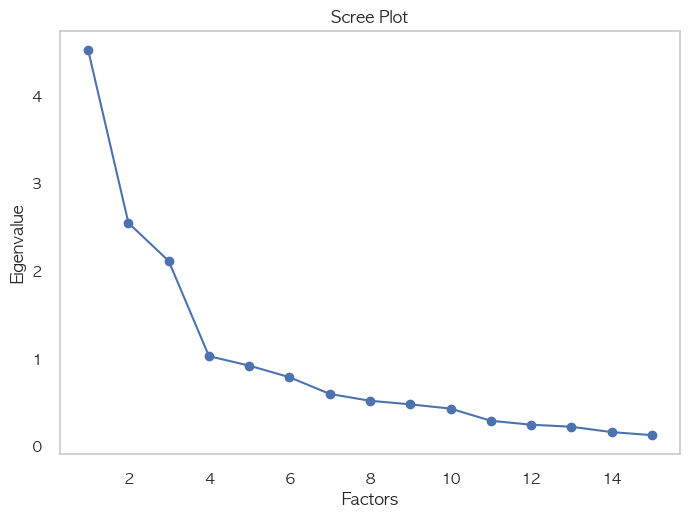

In [61]:
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# KMO와 Bartlett 테스트
kmo_all, kmo_model = calculate_kmo(london_normal[columns_lr_selected])
bartlett_chi_square_value, bartlett_p_value = calculate_bartlett_sphericity(london_normal[columns_lr_selected])
print(f"KMO: {kmo_model}, Bartlett p-value: {bartlett_p_value}")

# 고유값 계산
fa = FactorAnalyzer(n_factors=len(columns_lr_selected), rotation=None)
fa.fit(london_normal[columns_lr_selected])
ev, v = fa.get_eigenvalues()

# Scree Plot
plt.scatter(range(1, len(ev) + 1), ev)
plt.plot(range(1, len(ev) + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


#### 분산 설명 기준

/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:663: UserWarning:

No rotation will be performed when the number of factors equals 1.



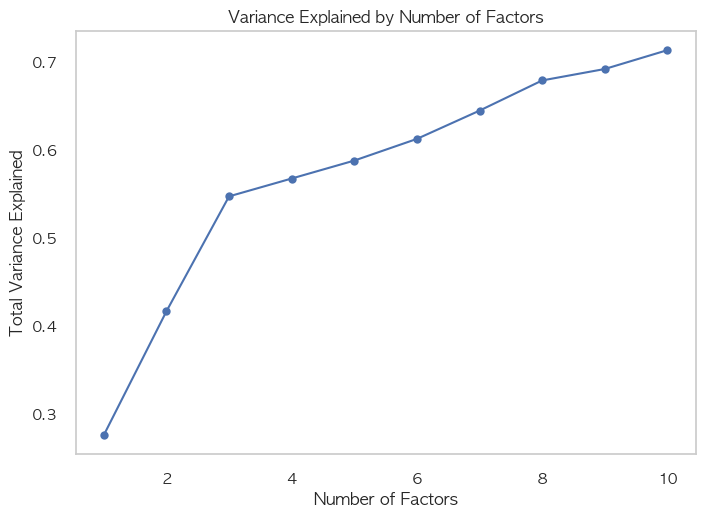

In [62]:
# 요인 수를 1부터 10까지 변화시키며 분산 설명 비율 계산
total_variance = []
for n in range(1, 11):
    fa = FactorAnalyzer(n_factors=n, rotation="varimax")
    fa.fit(london_normal[columns_lr_selected])
    total_variance.append(fa.get_factor_variance()[1].sum())

plt.plot(range(1, 11), total_variance, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Total Variance Explained')
plt.title('Variance Explained by Number of Factors')
plt.grid()
plt.show()

#### 평행 분석

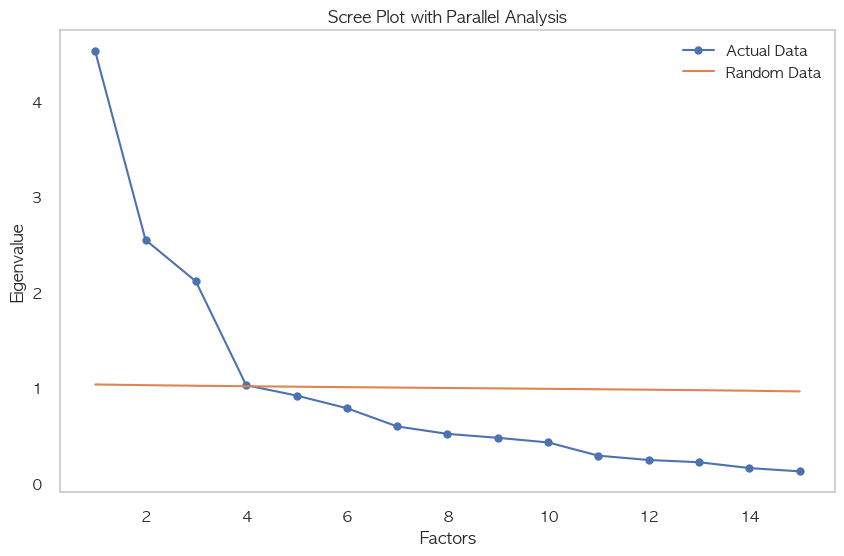

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# 데이터 준비
data = london_normal[columns_lr_selected]

# 실제 데이터의 고유값 계산
fa = FactorAnalyzer(n_factors=len(columns_lr_selected), rotation=None)
fa.fit(data)
ev, v = fa.get_eigenvalues()

# 무작위 데이터의 고유값 계산 함수
def get_random_eigenvalues(data, n_iter=1000):
    random_ev = []
    for _ in range(n_iter):
        random_data = np.random.normal(size=data.shape)
        fa.fit(random_data)
        ev, _ = fa.get_eigenvalues()
        random_ev.append(ev)
    return np.mean(random_ev, axis=0)

# 무작위 데이터의 평균 고유값 계산
random_ev = get_random_eigenvalues(data)

# Scree Plot 및 평행 분석 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o', label='Actual Data')
plt.plot(range(1, len(random_ev) + 1), random_ev, marker='x', label='Random Data')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot with Parallel Analysis')
plt.legend()
plt.grid()
plt.show()


In [64]:
# 평행 분석 결과 기반 요인 수 결정
n_factors_parallel = np.sum(ev > random_ev)
print(f"Parallel Analysis suggests {n_factors_parallel} factors")

Parallel Analysis suggests 4 factors


### 요인분석

In [65]:
# 선택된 요인 수로 요인 분석 수행
fa = FactorAnalyzer(n_factors=n_factors_parallel, rotation="varimax")
fa.fit(data)

# 데이터프레임화
london_loadings = pd.concat(
    [pd.DataFrame(fa.loadings_, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)]),
     pd.DataFrame(data.columns.tolist(), columns=['name of columns'])],
    axis=1
)
london_loadings

,Factor1,Factor2,Factor3,Factor4,name of columns
0,0.039150,0.087641,0.012721,0.217681,문의_응답률
1,-0.058564,0.015247,0.974100,-0.034901,수용_인원수
2,-0.000737,-0.065284,0.666305,0.045539,침실수
3,0.015580,-0.133643,0.729098,0.110004,숙소_가격
4,0.091113,0.722978,-0.102221,0.236062,리뷰수
5,0.063808,0.985342,-0.062591,0.218988,12개월_리뷰수
6,0.895857,0.055081,-0.013376,0.112485,숙소_정확성_리뷰점수
7,0.786076,0.029709,-0.003002,0.197451,숙소_청결도_리뷰점수
8,0.745906,0.070561,-0.032110,0.081241,숙소_체크인_리뷰점수
9,0.799940,0.065386,-0.013908,0.086673,숙소_소통_리뷰점수


In [66]:
london_loadings[london_loadings['Factor1'] >= 0.6]

,Factor1,Factor2,Factor3,Factor4,name of columns
6,0.895857,0.055081,-0.013376,0.112485,숙소_정확성_리뷰점수
7,0.786076,0.029709,-0.003002,0.197451,숙소_청결도_리뷰점수
8,0.745906,0.070561,-0.032110,0.081241,숙소_체크인_리뷰점수
9,0.799940,0.065386,-0.013908,0.086673,숙소_소통_리뷰점수
10,0.668945,0.033999,0.050635,0.072799,숙소_위치_리뷰점수
11,0.897830,0.069747,-0.032805,0.108093,숙소_가격_리뷰점수


Factor1에서 높은 유사성을 나타낸 값들<br>
 
6  숙소_정확성_리뷰점수<br>
7  숙소_청결도_리뷰점수<br>
8  숙소_체크인_리뷰점수<br>
9  숙소_소통_리뷰점수<br>
10  숙소_위치_리뷰점수<br>
11  숙소_가격_리뷰점수<br>

Factor1 = 서로 유사한 변수들을 묶어서 Factor1 라는 잠재 변수를 생성

In [67]:
london_loadings[london_loadings['Factor2'] >= 0.6]

,Factor1,Factor2,Factor3,Factor4,name of columns
4,0.091113,0.722978,-0.102221,0.236062,리뷰수
5,0.063808,0.985342,-0.062591,0.218988,12개월_리뷰수
12,0.039959,0.692727,-0.042337,0.102126,평균_리뷰수


Factor2에서 높은 유사성을 나타낸 값들<br>
 
4  리뷰수<br>
5  12개월_리뷰수<br>
12  평균_리뷰수<br>

해당 결과는 서로 유사한 변수들을 묶어서 Factor2 라는 잠재 변수를 생성한 것임.

In [68]:
london_loadings[london_loadings['Factor3'] >= 0.6]

,Factor1,Factor2,Factor3,Factor4,name of columns
1,-0.058564,0.015247,0.974100,-0.034901,수용_인원수
2,-0.000737,-0.065284,0.666305,0.045539,침실수
3,0.015580,-0.133643,0.729098,0.110004,숙소_가격


Factor3에서 높은 유사성을 나타낸 값들<br>
 
1  수용_인원수<br>
2  침실수<br>
3  숙소_가격<br>

해당 결과는 서로 유사한 변수들을 묶어서 Factor3 라는 잠재 변수를 생성한 것임.

In [69]:
london_loadings[london_loadings['Factor4'] >= 0.6]

,Factor1,Factor2,Factor3,Factor4,name of columns


In [70]:
# 요인 부하량 확인
loadings = fa.loadings_
print(pd.DataFrame(loadings, index=data.columns))

                    0         1         2         3
문의_응답률       0.039150  0.087641  0.012721  0.217681
수용_인원수      -0.058564  0.015247  0.974100 -0.034901
침실수         -0.000737 -0.065284  0.666305  0.045539
숙소_가격        0.015580 -0.133643  0.729098  0.110004
리뷰수          0.091113  0.722978 -0.102221  0.236062
12개월_리뷰수     0.063808  0.985342 -0.062591  0.218988
숙소_정확성_리뷰점수  0.895857  0.055081 -0.013376  0.112485
숙소_청결도_리뷰점수  0.786076  0.029709 -0.003002  0.197451
숙소_체크인_리뷰점수  0.745906  0.070561 -0.032110  0.081241
숙소_소통_리뷰점수   0.799940  0.065386 -0.013908  0.086673
숙소_위치_리뷰점수   0.668945  0.033999  0.050635  0.072799
숙소_가격_리뷰점수   0.897830  0.069747 -0.032805  0.108093
평균_리뷰수       0.039959  0.692727 -0.042337  0.102126
편의시설_개수      0.098058  0.066619  0.218423  0.434769
게스트선호_인코딩    0.136317  0.153211 -0.074833  0.317522


In [71]:
london_factors = pd.DataFrame(loadings, index=data.columns, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)])
london_factors

,Factor1,Factor2,Factor3,Factor4
문의_응답률,0.039150,0.087641,0.012721,0.217681
수용_인원수,-0.058564,0.015247,0.974100,-0.034901
침실수,-0.000737,-0.065284,0.666305,0.045539
숙소_가격,0.015580,-0.133643,0.729098,0.110004
리뷰수,0.091113,0.722978,-0.102221,0.236062
12개월_리뷰수,0.063808,0.985342,-0.062591,0.218988
숙소_정확성_리뷰점수,0.895857,0.055081,-0.013376,0.112485
숙소_청결도_리뷰점수,0.786076,0.029709,-0.003002,0.197451
숙소_체크인_리뷰점수,0.745906,0.070561,-0.032110,0.081241
숙소_소통_리뷰점수,0.799940,0.065386,-0.013908,0.086673


0.6 이상 <br>

- Factor1 : 숙소_정확성_리뷰점수, 숙소_청결도_리뷰점수, 숙소_체크인_리뷰점수, 숙소_소통_리뷰점수, 숙소_위치_리뷰점수, 숙소_가격_리뷰점수
- Factor2 : 리뷰수, 12개월_리뷰수, 평균_리뷰수
- Factor3 : 수용_인원수, 침실수, 숙소_가격
- Factor4 : 없음


In [72]:
# 요인 점수 추출
factor_scores = fa.transform(data)

# DF 화
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)])
factor_scores_df

,Factor1,Factor2,Factor3,Factor4
0,0.368121,0.905431,-0.440212,1.398414
1,0.153469,-2.138065,-1.630141,0.595601
2,0.392959,-1.598061,-0.639751,0.135607
3,0.176204,-2.068424,-0.813836,-0.054561
4,0.208269,0.924849,-0.588150,0.555024
...,...,...,...,...
31096,0.762185,-1.402179,-0.736699,-0.835086
31097,0.743054,-1.402648,1.053377,-0.336063
31098,-2.827404,-1.361451,-0.999204,0.064655
31099,0.728201,-1.073754,1.044984,-0.292979


### 다중회귀분석

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 독립 변수와 종속 변수로 데이터를 나눔
X = factor_scores_df
y = london_normal['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)   
print('RMSE: %0.2f'%rmse) 
print('MAE: %0.2f'%mae)  
print('결정계수(r2_score):',r2)
print()
print('y절편: ', np.round(lr.intercept_,2))

MSE: 0.00
RMSE: 0.03
MAE: 0.02
결정계수(r2_score): 0.87

y절편:  0.95


In [74]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)  # 독립 변수
y = london_normal['리뷰점수']  # 종속 변수

# 회귀모형 적합
london_normal_factor_lr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(london_normal_factor_lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 4.895e+04
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:16:58   Log-Likelihood:                 62650.
No. Observations:               31101   AIC:                        -1.253e+05
Df Residuals:                   31096   BIC:                        -1.252e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9492      0.000   5185.708      0.0

### 계층적 회귀 분석

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 주성분과 종속 변수를 포함한 데이터프레임 생성
factor_scores_df = pd.concat([factor_scores_df, london_normal['게스트_선호']], axis=1)


# '게스트_선호' 컬럼을 더미 변수로 변환 (카테고리 타입에서 숫자형으로 변환)
factor_scores_df['게스트_선호'] = factor_scores_df['게스트_선호'].map({'t': 1, 'f': 0}).astype(int)


# 독립 변수와 종속 변수로 데이터를 나눔
X = factor_scores_df
y = london_normal['리뷰점수']

# 상호작용 항 추가
for col in ['Factor1', 'Factor2', 'Factor3', 'Factor4']:
    X[col + '_x_게스트_선호'] = X[col] * X['게스트_선호']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)   
print('RMSE: %0.2f'%rmse) 
print('MAE: %0.2f'%mae)  
print('결정계수(r2_score):',r2)
print()
print('y절편: ', np.round(lr.intercept_,2))

MSE: 0.00
RMSE: 0.03
MAE: 0.02
결정계수(r2_score): 0.88

y절편:  0.95


In [76]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
london_normal_factor_hr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(london_normal_factor_hr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:16:58   Log-Likelihood:                 62765.
No. Observations:               31101   AIC:                        -1.255e+05
Df Residuals:                   31091   BIC:                        -1.254e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9487      0.000  